In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv("/content/final_data.csv")

In [13]:
df.head()

PLAYER_NAME  PLAYER_ID       TEAM_NAME_x LOCATION  MIN_x   FGM   FGA  \
0    AJ Green    1631260   Milwaukee Bucks     AWAY   9.70  1.41  3.11   
1    AJ Green    1631260   Milwaukee Bucks     HOME  12.15  1.55  3.86   
2  AJ Griffin    1631100     Atlanta Hawks     AWAY   9.13  1.12  3.62   
3  AJ Griffin    1631100     Atlanta Hawks     HOME   8.14  0.75  2.75   
4   AJ Lawson    1630639  Dallas Mavericks     AWAY   9.37  1.32  3.16   

   FG_PCT  FG3M  FG3A  ...  DEF_RATING_RANK  DREB_RANK  DREB_PCT_RANK  \
0    0.36  1.19  2.78  ...               19          3              4   
1    0.36  1.28  3.24  ...               19          3              4   
2    0.26  0.50  2.00  ...               27         22             16   
3    0.33  0.50  1.92  ...               27         22             16   
4    0.33  0.37  1.37  ...               18         14             21   

   STL_RANK  BLK_RANK  OPP_PTS_OFF_TOV_RANK  OPP_PTS_2ND_CHANCE_RANK  \
0        26        15                     6                       12   
1        26        15                     6                       12   
2        16        26                    18                       12   
3        16        26                    18                       12   
4        24        17                     7                       24   

   OPP_PTS_FB_RANK  OPP_PTS_PAINT_RANK  Conference  
0               10                  19        East  
1               10                  19        East  
2               28                  25        East  
3               28                  25        East  
4               26                  20        West  

[5 rows x 68 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAYER_NAME              2418 non-null   object 
 1   PLAYER_ID                2418 non-null   int64  
 2   TEAM_NAME_x              2418 non-null   object 
 3   LOCATION                 2418 non-null   object 
 4   MIN_x                    2418 non-null   float64
 5   FGM                      2418 non-null   float64
 6   FGA                      2418 non-null   float64
 7   FG_PCT                   2418 non-null   float64
 8   FG3M                     2418 non-null   float64
 9   FG3A                     2418 non-null   float64
 10  FG3_PCT                  2418 non-null   float64
 11  FTM                      2418 non-null   float64
 12  FTA                      2418 non-null   float64
 13  FT_PCT                   2418 non-null   float64
 14  OREB                    

In [ ]:
df.shape

(2418, 68)

EXPLANATORY DATA ANALYSIS


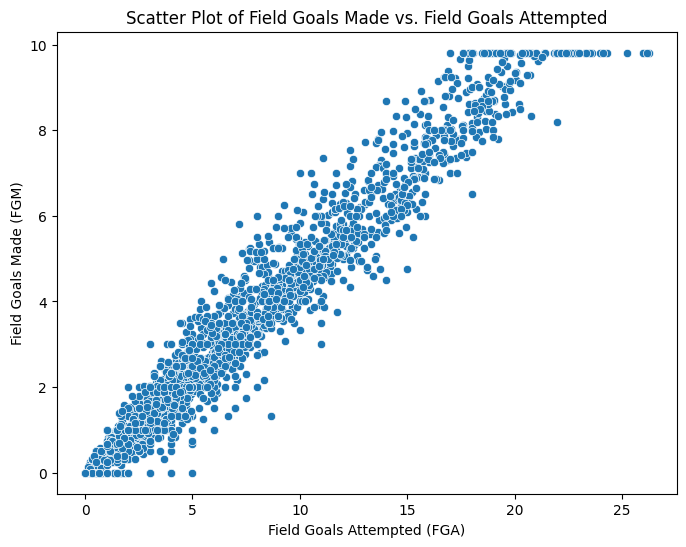

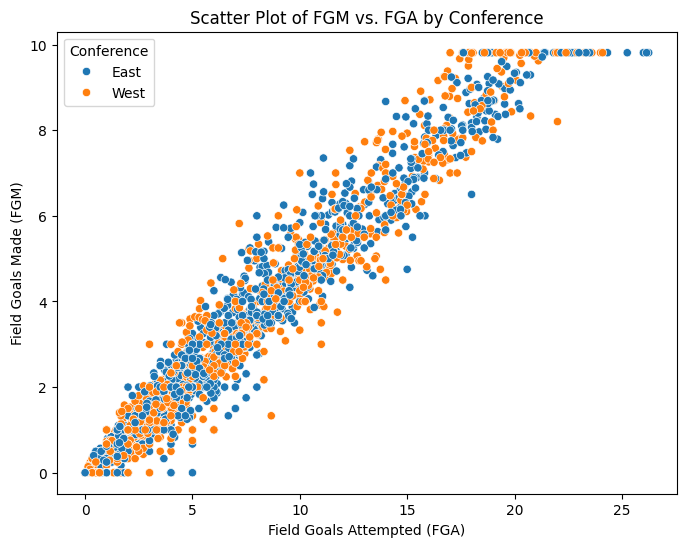

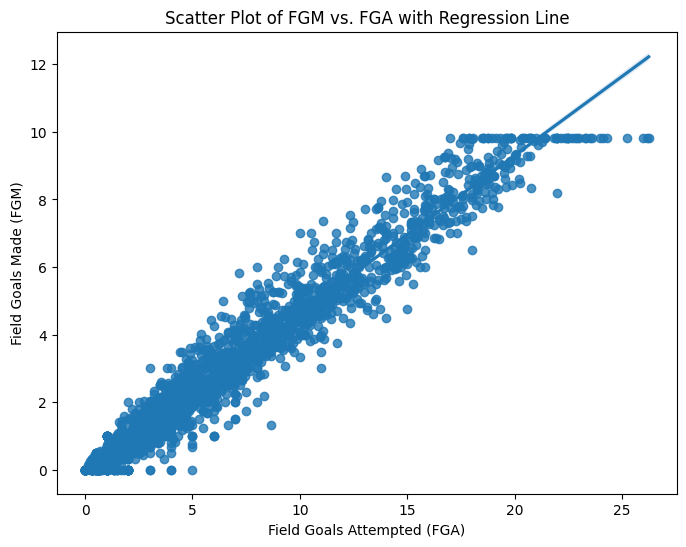

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of FGM vs. FGA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FGA', y='FGM', data=df)
plt.title('Scatter Plot of Field Goals Made vs. Field Goals Attempted')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Field Goals Made (FGM)')
plt.show()

# Scatter plot with hue (color-coded by Conference)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FGA', y='FGM', hue='Conference', data=df)
plt.title('Scatter Plot of FGM vs. FGA by Conference')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Field Goals Made (FGM)')
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='FGA', y='FGM', data=df)
plt.title('Scatter Plot of FGM vs. FGA with Regression Line')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Field Goals Made (FGM)')
plt.show()

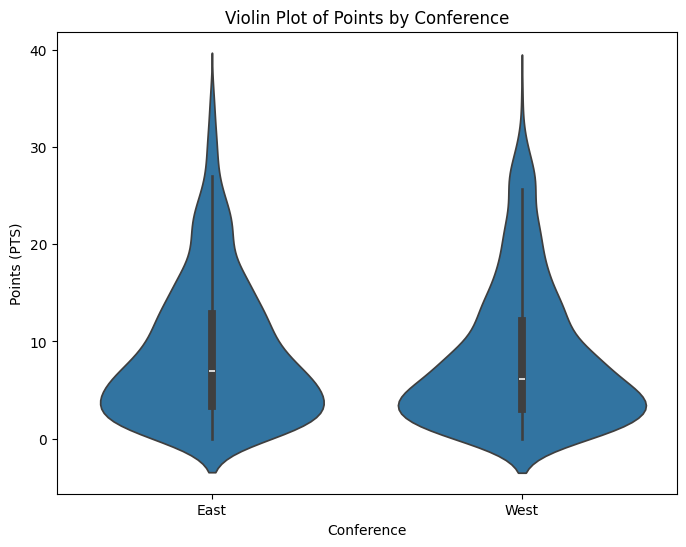

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot of PTS by Conference
plt.figure(figsize=(8, 6))
sns.violinplot(x='Conference', y='PTS', data=df)
plt.title('Violin Plot of Points by Conference')
plt.xlabel('Conference')
plt.ylabel('Points (PTS)')
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
radar_data = df[['PLAYER_NAME', 'PTS', 'AST', 'REB', 'STL_x', 'BLK_x']].groupby('PLAYER_NAME').mean().reset_index()

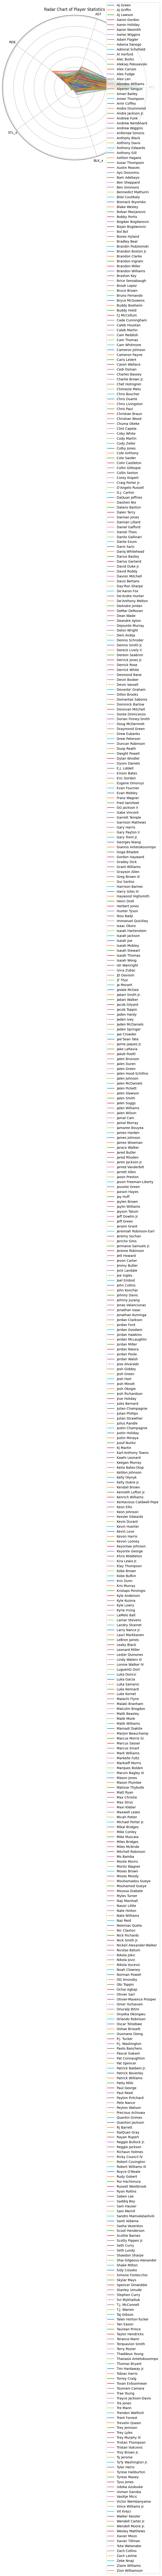

In [ ]:
def create_radar_chart(data):
    categories = list(data.columns[1:])
    num_vars = len(categories)

    # Compute angle for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i in range(len(data)):
        values = data.loc[i].drop('PLAYER_NAME').values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, label=data['PLAYER_NAME'][i])

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Radar Chart of Player Statistics')
    plt.show()

# Create radar chart
create_radar_chart(radar_data)

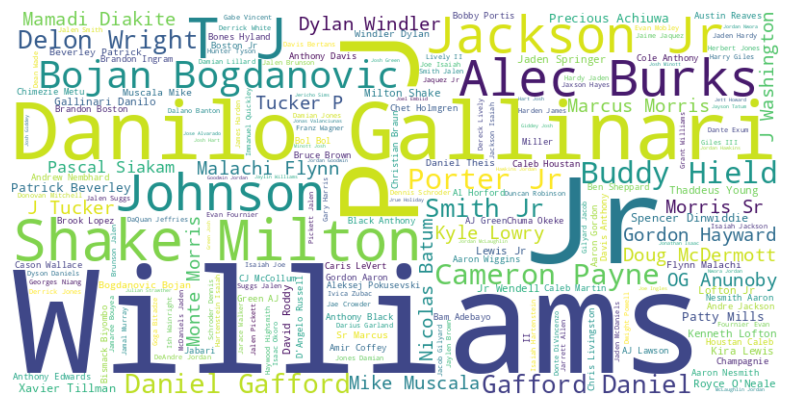

In [ ]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['PLAYER_NAME'].tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.describe()

PLAYER_ID        MIN_x          FGM          FGA       FG_PCT  \
count  2.418000e+03  2418.000000  2418.000000  2418.000000  2418.000000   
mean   1.320259e+06    19.412610     3.186352     6.876625     0.395074   
std    5.902202e+05    10.961718     2.631897     5.344765     0.158449   
min    2.544000e+03     0.300000     0.000000     0.000000     0.000000   
25%    1.626181e+06    10.252500     1.140000     2.837500     0.320000   
50%    1.629636e+06    18.735000     2.465000     5.340000     0.420000   
75%    1.630595e+06    28.880000     4.607500     9.857500     0.480000   
max    1.642013e+06    46.440000    12.330000    26.250000     1.000000   

              FG3M         FG3A      FG3_PCT          FTM          FTA  ...  \
count  2418.000000  2418.000000  2418.000000  2418.000000  2418.000000  ...   
mean      0.964851     2.741282     0.226807     1.297237     1.664946  ...   
std       0.930660     2.346131     0.158863     1.522238     1.833736  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.150000     0.800000     0.080000     0.300000     0.440000  ...   
50%       0.750000     2.255000     0.260000     0.815000     1.120000  ...   
75%       1.530000     4.210000     0.350000     1.740000     2.170000  ...   
max       6.000000    12.090000     1.000000    14.000000    15.670000  ...   

          MIN_RANK  DEF_RATING_RANK    DREB_RANK  DREB_PCT_RANK     STL_RANK  \
count  2418.000000      2418.000000  2418.000000    2418.000000  2418.000000   
mean     12.485525        13.956576    13.848222      13.776261    13.790323   
std       8.003568         8.551928     8.540233       8.521917     8.648534   
min       1.000000         1.000000     1.000000       1.000000     1.000000   
25%       6.000000         7.000000     7.000000       6.000000     7.000000   
50%      10.000000        13.000000    12.000000      13.000000    13.000000   
75%      21.000000        21.000000    21.000000      21.000000    21.000000   
max      26.000000        30.000000    30.000000      30.000000    30.000000   

          BLK_RANK  OPP_PTS_OFF_TOV_RANK  OPP_PTS_2ND_CHANCE_RANK  \
count  2418.000000           2418.000000              2418.000000   
mean     13.554591             13.964433                14.038048   
std       8.567899              8.509989                 8.371408   
min       1.000000              1.000000                 1.000000   
25%       6.000000              7.000000                 7.000000   
50%      12.000000             13.000000                13.000000   
75%      20.000000             20.000000                21.000000   
max      30.000000             30.000000                30.000000   

       OPP_PTS_FB_RANK  OPP_PTS_PAINT_RANK  
count      2418.000000         2418.000000  
mean         13.994210           14.037634  
std           8.302562            8.363820  
min           1.000000            1.000000  
25%           7.000000            7.000000  
50%          13.000000           13.000000  
75%          21.000000           21.000000  
max          30.000000           30.000000  

[8 rows x 56 columns]

DATA PRE PROCESSING

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [PLAYER_NAME, PLAYER_ID, TEAM_NAME_x, LOCATION, MIN_x, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB_x, REB, AST, TOV, STL_x, BLK_x, BLKA, PF, PFD, PTS, PLUS_MINUS, Efficiency, Season Type, GP_x, W_x, L_x, Logo_URL, DISPLAY_FIRST_LAST_x, TEAM_ID, TEAM_ABBREVIATION, HEADSHOT_URL, DISPLAY_FIRST_LAST_y, POSITION, TEAM_NAME_y, GP_y, W_y, L_y, W_PCT, MIN_y, DEF_RATING, DREB_y, DREB_PCT, STL_y, BLK_y, OPP_PTS_OFF_TOV, OPP_PTS_2ND_CHANCE, OPP_PTS_FB, OPP_PTS_PAINT, GP_RANK, W_RANK, L_RANK, W_PCT_RANK, MIN_RANK, DEF_RATING_RANK, DREB_RANK, DREB_PCT_RANK, STL_RANK, BLK_RANK, OPP_PTS_OFF_TOV_RANK, OPP_PTS_2ND_CHANCE_RANK, OPP_PTS_FB_RANK, OPP_PTS_PAINT_RANK, Conference]
Index: []

[0 rows x 68 columns]

In [ ]:
df.isnull().sum()

PLAYER_NAME                0
PLAYER_ID                  0
TEAM_NAME_x                0
LOCATION                   0
MIN_x                      0
                          ..
OPP_PTS_OFF_TOV_RANK       0
OPP_PTS_2ND_CHANCE_RANK    0
OPP_PTS_FB_RANK            0
OPP_PTS_PAINT_RANK         0
Conference                 0
Length: 68, dtype: int64

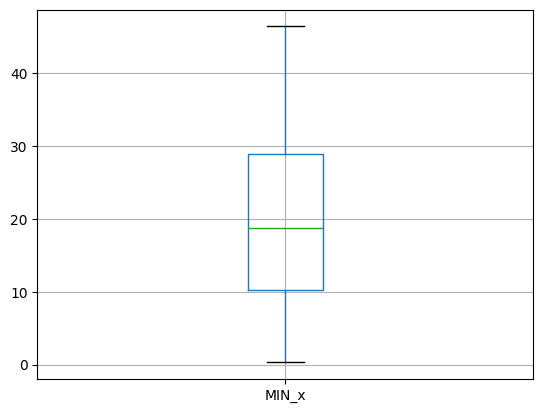

In [ ]:
df.boxplot(column=['MIN_x'])
plt.show()


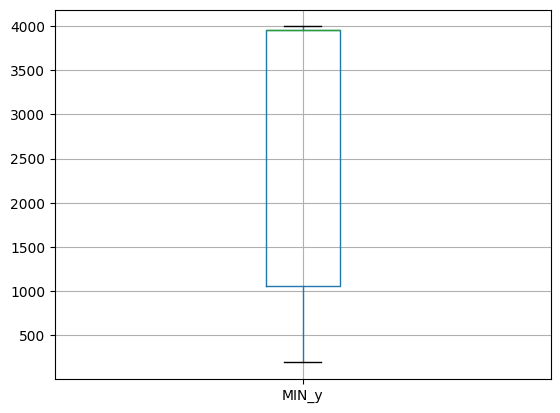

In [ ]:
df.boxplot(column=['MIN_y'])
plt.show()

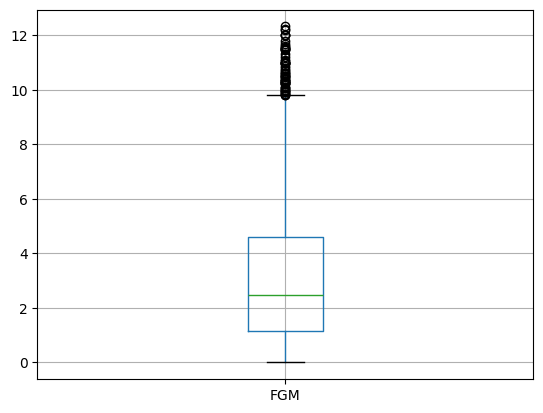

In [ ]:
df.boxplot(column=['FGM'])
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lrincome,urincome=remove_outlier(df['FGM'])
df['FGM']=np.where(df['FGM']>urincome,urincome,df['FGM'])
df['FGM']=np.where(df['FGM']<lrincome,lrincome,df['FGM'])


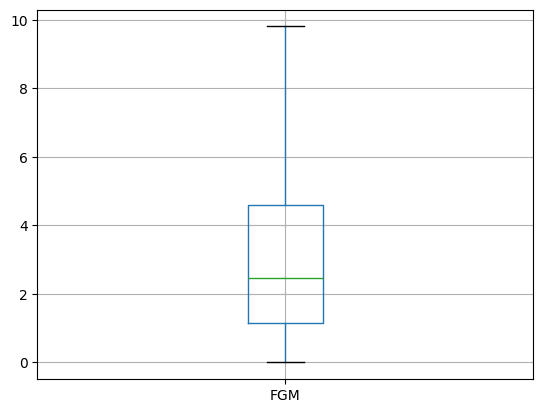

In [ ]:
df.boxplot(column=['FGM'])
plt.show()

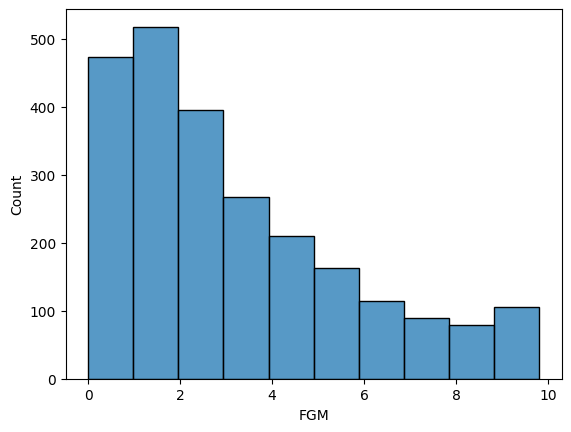

In [ ]:
sns.histplot(df.FGM,bins=10);

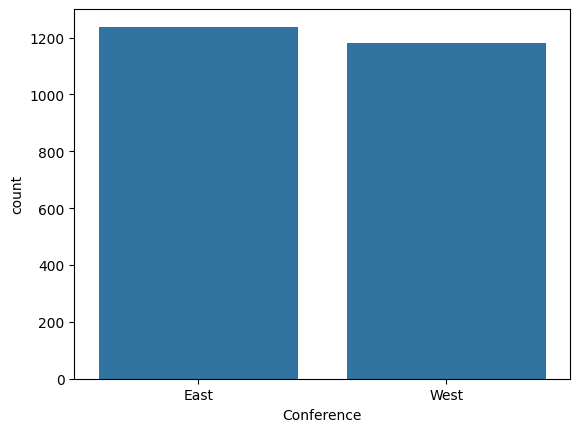

In [ ]:
sns.countplot(x=df["Conference"]);

In [ ]:

numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

PLAYER_ID     MIN_x       FGM       FGA    FG_PCT  \
PLAYER_ID                 1.000000 -0.141303 -0.103907 -0.104969 -0.042553   
MIN_x                    -0.141303  1.000000  0.885289  0.890593  0.496641   
FGM                      -0.103907  0.885289  1.000000  0.974729  0.518965   
FGA                      -0.104969  0.890593  0.974729  1.000000  0.400747   
FG_PCT                   -0.042553  0.496641  0.518965  0.400747  1.000000   
FG3M                     -0.083942  0.706041  0.677080  0.737226  0.251961   
FG3A                     -0.077579  0.733603  0.688222  0.780753  0.173001   
FG3_PCT                  -0.081889  0.530731  0.465639  0.486482  0.385716   
FTM                      -0.148107  0.691863  0.810381  0.812812  0.346271   
FTA                      -0.139282  0.694629  0.818658  0.809793  0.376672   
FT_PCT                   -0.120694  0.747735  0.784355  0.777194  0.446931   
OREB                     -0.046696  0.445174  0.411164  0.318198  0.481807   
DREB_x                   -0.123056  0.764151  0.758299  0.706419  0.493490   
REB                      -0.108281  0.721478  0.706240  0.637308  0.527721   
AST                      -0.170964  0.739048  0.767561  0.789567  0.310583   
TOV                      -0.121077  0.773149  0.831100  0.841915  0.367536   
STL_x                    -0.099214  0.684752  0.602770  0.615937  0.316970   
BLK_x                    -0.052491  0.463941  0.415638  0.349759  0.401286   
BLKA                     -0.008062  0.667403  0.731459  0.744884  0.317464   
PF                       -0.099547  0.764660  0.637266  0.615732  0.487789   
PFD                      -0.145055  0.749815  0.844805  0.832968  0.411066   
PTS                      -0.120561  0.878833  0.987320  0.978777  0.480459   
PLUS_MINUS               -0.067540  0.045163  0.099501  0.058498  0.121026   
Efficiency               -0.146421  0.879154  0.943943  0.891552  0.578154   
GP_x                           NaN       NaN       NaN       NaN       NaN   
W_x                      -0.115268 -0.079735 -0.068290 -0.076285 -0.064568   
L_x                       0.115268  0.079735  0.068290  0.076285  0.064568   
TEAM_ID                   0.085594 -0.010922 -0.010051 -0.002167 -0.018560   
GP_y                      0.075683 -0.052037  0.011946 -0.016140  0.083172   
W_y                      -0.027318 -0.069506 -0.000137 -0.036590  0.074321   
L_y                       0.146299 -0.014360  0.019015  0.010228  0.058867   
W_PCT                    -0.083604 -0.066342 -0.015563 -0.046551  0.059305   
MIN_y                     0.075971 -0.051872  0.012024 -0.016015  0.083054   
DEF_RATING                0.004413  0.028704  0.027385  0.024350 -0.007197   
DREB_y                    0.068528 -0.056876  0.008757 -0.020557  0.084054   
DREB_PCT                  0.031900 -0.054009 -0.039160 -0.036296  0.016379   
STL_y                     0.072342 -0.045914  0.017070 -0.010399  0.081392   
BLK_y                     0.066767 -0.057622  0.007079 -0.022849  0.090224   
OPP_PTS_OFF_TOV           0.097438 -0.049403  0.010138 -0.013744  0.074443   
OPP_PTS_2ND_CHANCE        0.080572 -0.046055  0.015653 -0.011625  0.085823   
OPP_PTS_FB                0.088336 -0.042653  0.014068 -0.009843  0.077426   
OPP_PTS_PAINT             0.084454 -0.052331  0.012365 -0.015408  0.087127   
GP_RANK                  -0.075557  0.064912 -0.004905  0.027814 -0.095373   
W_RANK                    0.159360  0.034528  0.025446  0.040156  0.003199   
L_RANK                    0.168207  0.010040  0.020359  0.024838  0.019724   
W_PCT_RANK                0.157140  0.035423  0.026949  0.040655  0.004313   
MIN_RANK                 -0.028140 -0.009482  0.009758  0.000260  0.025739   
DEF_RATING_RANK           0.071182  0.002052  0.014478  0.010963  0.019719   
DREB_RANK                 0.094103  0.048596  0.043784  0.052134  0.010414   
DREB_PCT_RANK             0.038388  0.028590  0.044331  0.035012  0.048450   
STL_RANK                  0.031394 -0.032741 -0

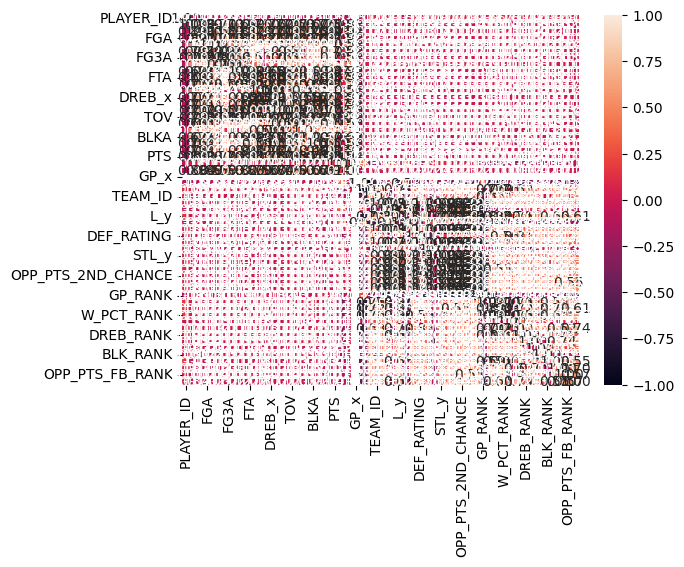

In [ ]:

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

SCALING AND ENCODING

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [ ]:
df['FGM'] = std_scale.fit_transform(df[['FGM']])

In [ ]:

df.head()

PLAYER_NAME  PLAYER_ID       TEAM_NAME_x LOCATION  MIN_x       FGM   FGA  \
0    AJ Green    1631260   Milwaukee Bucks     AWAY   9.70 -0.683589  3.11   
1    AJ Green    1631260   Milwaukee Bucks     HOME  12.15 -0.628982  3.86   
2  AJ Griffin    1631100     Atlanta Hawks     AWAY   9.13 -0.796703  3.62   
3  AJ Griffin    1631100     Atlanta Hawks     HOME   8.14 -0.941020  2.75   
4   AJ Lawson    1630639  Dallas Mavericks     AWAY   9.37 -0.718693  3.16   

   FG_PCT  FG3M  FG3A  ...  DEF_RATING_RANK  DREB_RANK  DREB_PCT_RANK  \
0    0.36  1.19  2.78  ...               19          3              4   
1    0.36  1.28  3.24  ...               19          3              4   
2    0.26  0.50  2.00  ...               27         22             16   
3    0.33  0.50  1.92  ...               27         22             16   
4    0.33  0.37  1.37  ...               18         14             21   

   STL_RANK  BLK_RANK  OPP_PTS_OFF_TOV_RANK  OPP_PTS_2ND_CHANCE_RANK  \
0        26        15                     6                       12   
1        26        15                     6                       12   
2        16        26                    18                       12   
3        16        26                    18                       12   
4        24        17                     7                       24   

   OPP_PTS_FB_RANK  OPP_PTS_PAINT_RANK  Conference  
0               10                  19        East  
1               10                  19        East  
2               28                  25        East  
3               28                  25        East  
4               26                  20        West  

[5 rows x 68 columns]

In [ ]:
import pandas as pd


file_path = 'final_data.csv'
df = pd.read_csv(file_path, encoding='ascii')

print(df.head())

  PLAYER_NAME  PLAYER_ID       TEAM_NAME_x LOCATION  MIN_x   FGM   FGA  \
0    AJ Green    1631260   Milwaukee Bucks     AWAY   9.70  1.41  3.11   
1    AJ Green    1631260   Milwaukee Bucks     HOME  12.15  1.55  3.86   
2  AJ Griffin    1631100     Atlanta Hawks     AWAY   9.13  1.12  3.62   
3  AJ Griffin    1631100     Atlanta Hawks     HOME   8.14  0.75  2.75   
4   AJ Lawson    1630639  Dallas Mavericks     AWAY   9.37  1.32  3.16   

   FG_PCT  FG3M  FG3A  ...  DEF_RATING_RANK  DREB_RANK  DREB_PCT_RANK  \
0    0.36  1.19  2.78  ...               19          3              4   
1    0.36  1.28  3.24  ...               19          3              4   
2    0.26  0.50  2.00  ...               27         22             16   
3    0.33  0.50  1.92  ...               27         22             16   
4    0.33  0.37  1.37  ...               18         14             21   

   STL_RANK  BLK_RANK  OPP_PTS_OFF_TOV_RANK  OPP_PTS_2ND_CHANCE_RANK  \
0        26        15                     6 

REGRESSION MODELS

In [ ]:
categorical_columns = ['LOCATION', 'Season Type']
dummies = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
X = dummies[['MIN_x', 'FGM', 'FG3M', 'FTM', 'OREB', 'DREB_x']]
y = dummies['PTS']


In [ ]:
dummies
dummies.columns

Index(['PLAYER_NAME', 'PLAYER_ID', 'TEAM_NAME_x', 'MIN_x', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB_x', 'REB', 'AST', 'TOV', 'STL_x', 'BLK_x', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'Efficiency', 'GP_x', 'W_x', 'L_x', 'Logo_URL',
       'DISPLAY_FIRST_LAST_x', 'TEAM_ID', 'TEAM_ABBREVIATION', 'HEADSHOT_URL',
       'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y', 'GP_y', 'W_y', 'L_y',
       'W_PCT', 'MIN_y', 'DEF_RATING', 'DREB_y', 'DREB_PCT', 'STL_y', 'BLK_y',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'DEF_RATING_RANK', 'DREB_RANK', 'DREB_PCT_RANK', 'STL_RANK', 'BLK_RANK',
       'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK', 'OPP_PTS_FB_RANK',
       'OPP_PTS_PAINT_RANK', 'Conference', 'LOCATION_AWAY', 'LOCATION_HOME',
       'LOCATION_OVERALL', 'Season Type_Playoffs',
       'Season Type_Regular Seas

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# dimensions of train and test data
X_train.shape,
X_test.shape,


((726, 6),)

In [ ]:
y_train.shape,
y_test.shape,

((726,),)

In [ ]:
# description of train and test data
X_train.describe(),
X_test.describe(),


(            MIN_x         FGM        FG3M         FTM        OREB      DREB_x
 count  726.000000  726.000000  726.000000  726.000000  726.000000  726.000000
 mean    19.675675    3.250675    0.984876    1.302383    0.871460    2.648733
 std     11.173829    2.641685    0.968216    1.410068    0.836173    1.997438
 min      0.650000    0.000000    0.000000    0.000000    0.000000    0.000000
 25%     10.440000    1.082500    0.140000    0.330000    0.310000    1.110000
 50%     19.150000    2.550000    0.750000    0.870000    0.670000    2.250000
 75%     29.635000    4.857500    1.527500    1.737500    1.160000    3.697500
 max     46.440000   12.190000    4.820000    7.560000    6.000000   13.000000,)

In [ ]:
y_train.describe(),
y_test.describe()

count    726.000000
mean       8.788705
std        7.219698
min        0.000000
25%        3.187500
50%        6.945000
75%       13.230000
max       36.000000
Name: PTS, dtype: float64

In [ ]:
# STEP9: BUILDIDING MLR MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
accuracies

array([0.99999929, 0.99999931, 0.99999904, 0.9999993 , 0.99999907,
       0.99999901, 0.99999912, 0.99999924, 0.99999914, 0.99999872])

In [ ]:
# Regression coefficients
regressor.coef_ #slope


array([-2.95647090e-05,  1.99995826e+00,  1.00009002e+00,  1.00000589e+00,
       -5.19353960e-05,  3.52930279e-04])

In [ ]:
regressor.intercept_

-0.0002497080069083779

In [ ]:
# STEP10: PREDICTING ON TEST DATA
y_pred = regressor.predict(X_test)
y_pred

array([ 6.59739457e-01,  1.22600402e+01,  5.63995261e+00,  7.33020716e+00,
        1.21893514e+01,  7.79052084e+00,  1.85994823e+01,  1.65112271e+01,
        1.71981381e+00,  3.00992781e+00,  6.40991142e+00,  7.25976778e+00,
        2.39901544e+01,  1.50009232e+01,  5.77002131e+00,  1.09997887e+01,
       -3.13563556e-04,  7.66003259e+00,  3.79978074e+00,  6.35990758e+00,
        1.63982303e+00,  1.55011257e+01,  6.20001532e+00,  3.76987033e+00,
        1.93400647e+01,  1.33216254e+01,  1.49983173e+00,  6.77965412e+00,
        2.28965163e+00,  7.58947280e+00,  5.16978891e+00,  1.38898201e+01,
        3.60116204e+01,  4.06991764e+00,  7.86835636e-05,  6.96014533e+00,
        4.65992273e+00,  2.70797961e+01,  1.79704247e+01,  3.58978004e+00,
        3.49983929e+00,  1.29970148e+00,  1.32998696e+00,  5.01016823e+00,
        1.27201944e+01,  2.36901888e+01,  3.58987286e+00,  1.64996019e+01,
        1.09991467e+00,  6.18006993e+00,  2.93966079e+00,  1.56598598e+01,
        3.33011645e+00,  

In [ ]:
# STEP11: MODEL EVALUATION: MSE, R2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mean_squared_error(y_test, y_pred)


4.4454997947607856e-05

In [ ]:
r2_score(y_test, y_pred)

0.9999991459543197

In [ ]:
y_test.max()

36.0

In [ ]:
y_test.min()

0.0

In [ ]:
mean_absolute_error(y_test, y_pred)

0.004487990626998849

PREDICTION

In [ ]:
sample_data = pd.DataFrame({
    'MIN_x': [200],
    'FGM': [0.5],
    'FG3M': [2],
    'FTM': [5],
    'OREB': [8],
    'DREB_x': [20]
})
predicted_pts = regressor.predict(sample_data)

print("Predicted PTS:", predicted_pts[0])

Predicted PTS: 8.000669102757023


In [ ]:
# Check for Endogenity of regressors
linearity_test_df = pd.DataFrame(X_test)
endogenity_check = linearity_test_df.corr()
endogenity_check

MIN_x       FGM      FG3M       FTM      OREB    DREB_x
MIN_x   1.000000  0.879908  0.718498  0.713426  0.442920  0.774495
FGM     0.879908  1.000000  0.709559  0.838073  0.402345  0.747052
FG3M    0.718498  0.709559  1.000000  0.562747 -0.051895  0.376497
FTM     0.713426  0.838073  0.562747  1.000000  0.324281  0.613495
OREB    0.442920  0.402345 -0.051895  0.324281  1.000000  0.679470
DREB_x  0.774495  0.747052  0.376497  0.613495  0.679470  1.000000

In [ ]:
#MULTICOLLINEARITY
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(endogenity_check, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.close()



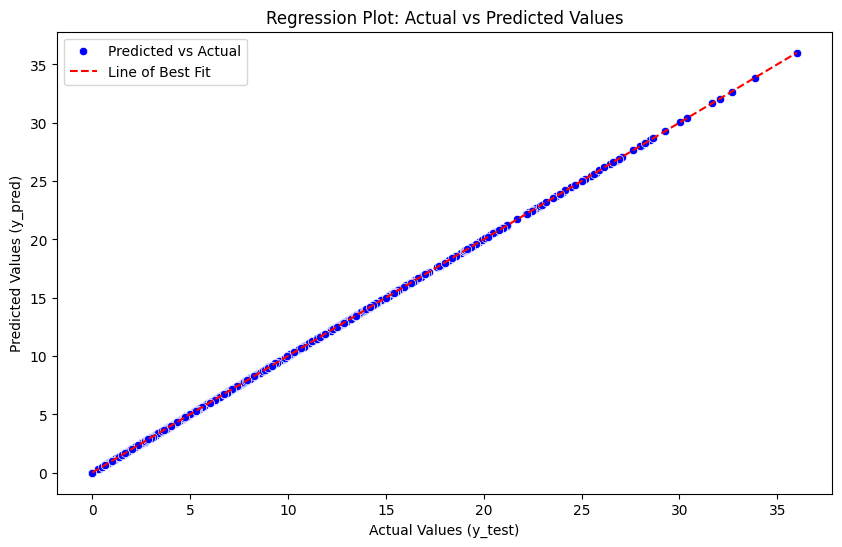

In [ ]:
# Plotting the regression graph
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')

# Plotting the line of best fit
sns.lineplot(x=y_test, y=y_test, color='red', label='Line of Best Fit', linestyle='--')

# Adding titles and labels
plt.title('Regression Plot: Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

# Display the plot
plt.legend()
plt.show()


SIMPLE LINEAR REGRESSION

In [ ]:
#SIMPLE LINEAR
X = df[['FGA']]
y = df['FGM']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficient (slope): 0.48250361533561215
Intercept: -0.1266994760563076
Mean Squared Error: 0.3325890826489588
R-squared: 0.9493352314116001


POLYNOMIAL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:

yld = pd.read_csv('/content/final_data.csv', sep=',', index_col=0)
yld.head()


PLAYER_ID       TEAM_NAME_x LOCATION  MIN_x   FGM   FGA  FG_PCT  \
PLAYER_NAME                                                                    
AJ Green       1631260   Milwaukee Bucks     AWAY   9.70  1.41  3.11    0.36   
AJ Green       1631260   Milwaukee Bucks     HOME  12.15  1.55  3.86    0.36   
AJ Griffin     1631100     Atlanta Hawks     AWAY   9.13  1.12  3.62    0.26   
AJ Griffin     1631100     Atlanta Hawks     HOME   8.14  0.75  2.75    0.33   
AJ Lawson      1630639  Dallas Mavericks     AWAY   9.37  1.32  3.16    0.33   

             FG3M  FG3A  FG3_PCT  ...  DEF_RATING_RANK  DREB_RANK  \
PLAYER_NAME                       ...                               
AJ Green     1.19  2.78     0.31  ...               19          3   
AJ Green     1.28  3.24     0.32  ...               19          3   
AJ Griffin   0.50  2.00     0.25  ...               27         22   
AJ Griffin   0.50  1.92     0.24  ...               27         22   
AJ Lawson    0.37  1.37     0.14  ...               18         14   

             DREB_PCT_RANK  STL_RANK  BLK_RANK  OPP_PTS_OFF_TOV_RANK  \
PLAYER_NAME                                                            
AJ Green                 4        26        15                     6   
AJ Green                 4        26        15                     6   
AJ Griffin              16        16        26                    18   
AJ Griffin              16        16        26                    18   
AJ Lawson               21        24        17                     7   

             OPP_PTS_2ND_CHANCE_RANK  OPP_PTS_FB_RANK  OPP_PTS_PAINT_RANK  \
PLAYER_NAME                                                                 
AJ Green                          12               10                  19   
AJ Green                          12               10                  19   
AJ Griffin                        12               28                  25   
AJ Griffin                        12               28                  25   
AJ Lawson                         24               26                  20   

             Conference  
PLAYER_NAME              
AJ Green           East  
AJ Green           East  
AJ Griffin         East  
AJ Griffin         East  
AJ Lawson          West  

[5 rows x 67 columns]

In [ ]:

yld.shape

(2418, 67)

In [ ]:
# Selecting FGA as the feature and FGM as the target
X = df[['FGA']]
y = df['FGM']

# Creating polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [ ]:
# Splitting the data into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model_poly = LinearRegression()

# Fitting the model to the polynomial transformed training data
model_poly.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# Initialize polynomial models for degrees 2 and 3
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)

poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)

# Fit the polynomial regression models
model_poly_2 = LinearRegression().fit(X_poly_2, y)
model_poly_3 = LinearRegression().fit(X_poly_3, y)


In [ ]:
# Generate predictions
y_pred_poly_2 = model_poly_2.predict(poly_2.transform(X))
y_pred_poly_3 = model_poly_3.predict(poly_3.transform(X))

# Sort values for plotting curves smoothly
sorted_X = np.sort(X.values.flatten())
sorted_X_poly_2 = poly_2.transform(sorted_X.reshape(-1, 1))
sorted_X_poly_3 = poly_3.transform(sorted_X.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


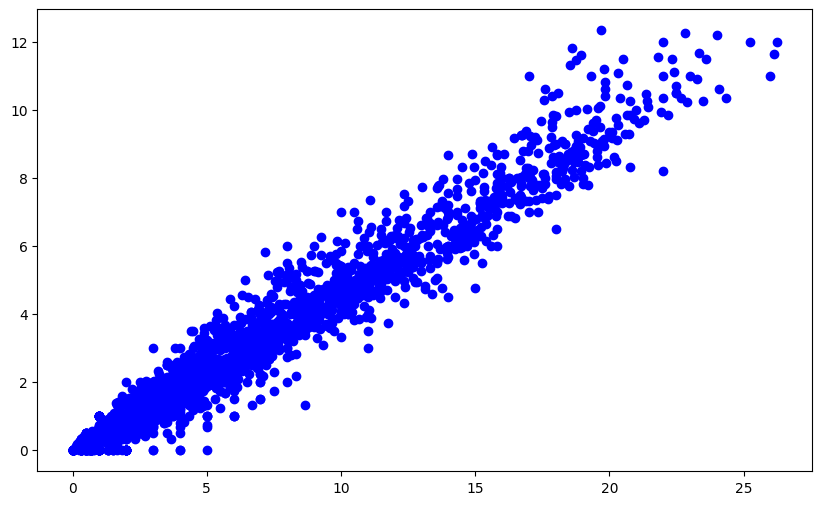

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')


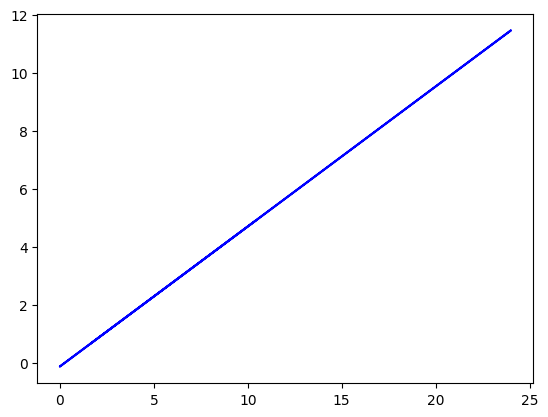

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
# Plot linear regression
plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression')

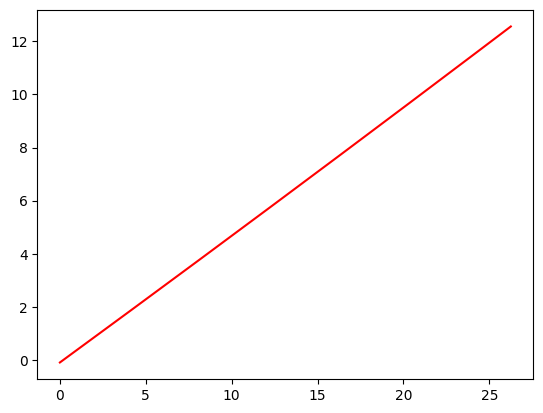

In [ ]:
# Plot polynomial regression (degree 2)
plt.plot(sorted_X, model_poly_2.predict(sorted_X_poly_2), color='red', label='Polynomial Regression (degree 2)')


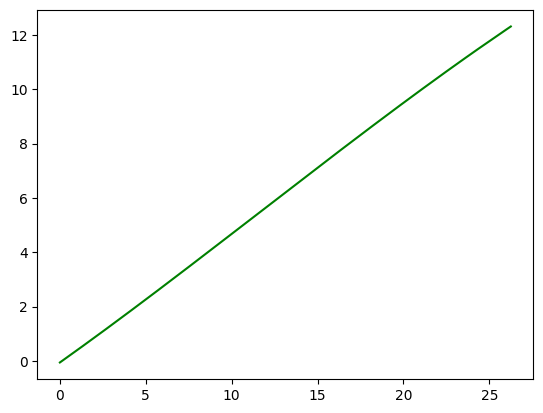

In [ ]:

# Plot polynomial regression (degree 3)
plt.plot(sorted_X, model_poly_3.predict(sorted_X_poly_3), color='green', label='Polynomial Regression (degree 3)')

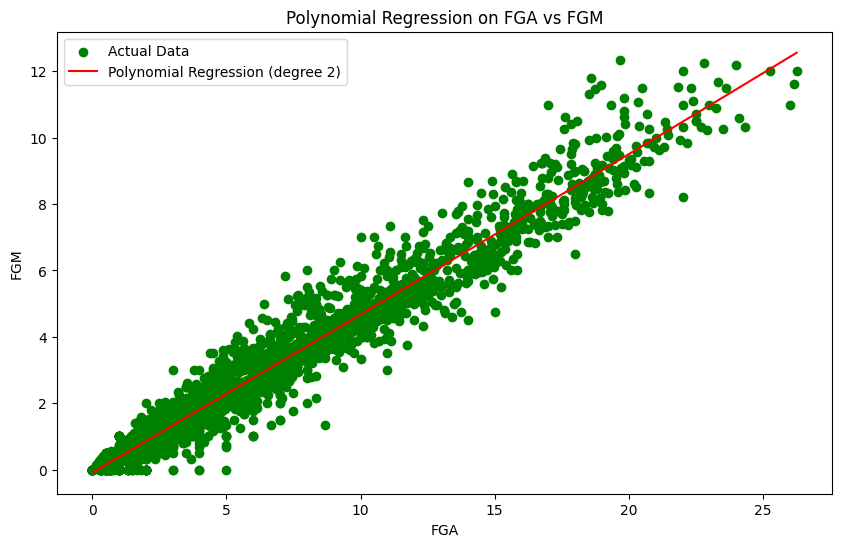

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
X_pred = pd.DataFrame(np.linspace(X['FGA'].min(), X['FGA'].max(), 50), columns=['FGA'])
X_pred_poly = poly.transform(X_pred)

# Generate predictions
y_pred = poly_model.predict(X_pred_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X_pred['FGA'], y_pred, color='red', label='Polynomial Regression (degree 2)')
plt.xlabel('FGA')
plt.ylabel('FGM')
plt.title('Polynomial Regression on FGA vs FGM')
plt.legend()
plt.show()

In [ ]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficient (slope): 0.48250361533561215
Intercept: -0.1266994760563076
Mean Squared Error: 0.3325890826489588
R-squared: 0.9493352314116001


CLASSIFICATION MODEL

logistic regression

In [ ]:
#  logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

threshold = df['PTS'].mean()
df['PTS_above_average'] = (df['PTS'] > threshold).astype(int)

X = dummies[['MIN_x', 'FGM', 'FG3M', 'FTM', 'OREB', 'DREB_x']]
y = df['PTS_above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix for more detailed evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9834710743801653
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.98      0.98      0.98       202

    accuracy                           0.98       484
   macro avg       0.98      0.98      0.98       484
weighted avg       0.98      0.98      0.98       484

[[278   4]
 [  4 198]]


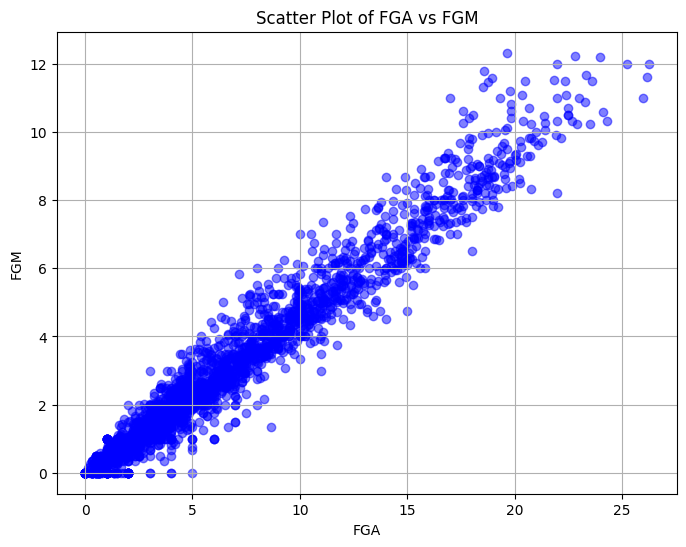

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['FGA'], df['FGM'], color='blue', alpha=0.5)
plt.xlabel('FGA')
plt.ylabel('FGM')
plt.title('Scatter Plot of FGA vs FGM')
plt.grid(True)
plt.show()

KNN

In [ ]:
#CLASSIFICATION -KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
features = df[['MIN_x', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB_x', 'REB', 'AST', 'TOV', 'STL_x', 'BLK_x', 'PTS', 'Efficiency']]
target = df['Conference']



In [ ]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)



In [ ]:
# Implementing the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Making predictions on the test set
y_pred = knn.predict(X_test)



In [ ]:
# Evaluating the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
# Displaying the confusion matrix and classification report
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Confusion Matrix:
 [[165  89]
 [ 80 150]]
Classification Report:
               precision    recall  f1-score   support

        East       0.67      0.65      0.66       254
        West       0.63      0.65      0.64       230

    accuracy                           0.65       484
   macro avg       0.65      0.65      0.65       484
weighted avg       0.65      0.65      0.65       484



In [ ]:
# Function to predict the conference based on player statistics
def predict_conference(player_stats):

    player_stats_scaled = scaler.transform([player_stats])
    prediction = knn.predict(player_stats_scaled)
    return prediction[0]
example_player_stats = [30, 10, 20, 0.5, 5, 10, 0.5, 8, 10, 0.8, 2, 5, 7, 10, 3, 1, 0, 25, 15]

predicted_conference = predict_conference(example_player_stats)
print("Predicted Conference:", predicted_conference)

Predicted Conference: East


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NAIVE BAYE'S

In [ ]:
#NAIVE BAYE'S THEOREM
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
dummies = pd.get_dummies(df, columns=categorical_columns)

X = dummies[['MIN_x', 'FGM', 'FG3M', 'FTM', 'OREB', 'DREB_x']]  # Features
y = df['Conference']  # Target variable

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
nb_model = GaussianNB()  # Using Gaussian Naive Bayes
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:

y_pred = nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4896694214876033
              precision    recall  f1-score   support

        East       0.52      0.39      0.44       254
        West       0.47      0.60      0.53       230

    accuracy                           0.49       484
   macro avg       0.49      0.50      0.49       484
weighted avg       0.50      0.49      0.48       484

[[ 98 156]
 [ 91 139]]


PREDICTION

In [ ]:
sample_data = [[30, 8, 2, 5, 3, 6]]

In [ ]:
sample_df = pd.DataFrame(sample_data, columns=['MIN_x', 'FGM', 'FG3M', 'FTM', 'OREB', 'DREB_x'])

In [ ]:
predicted_conference = nb_model.predict(sample_df)
print("Predicted Conference:", predicted_conference[0])

Predicted Conference: East


SVM

In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC


In [ ]:
unique_conferences = df['Conference'].unique()
print(unique_conferences)

['East' 'West']


In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:

X_encoded = df[numeric_features].drop(columns=['GP_y', 'W_y', 'L_y', 'W_PCT', 'MIN_y', 'DEF_RATING',
                                               'DREB_y', 'DREB_PCT', 'STL_y', 'BLK_y',
                                               'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE',
                                               'OPP_PTS_FB', 'OPP_PTS_PAINT', 'GP_RANK',
                                               'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
                                               'DEF_RATING_RANK', 'DREB_RANK',
                                               'DREB_PCT_RANK', 'STL_RANK', 'BLK_RANK',
                                               'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK',
                                               'OPP_PTS_FB_RANK', 'OPP_PTS_PAINT_RANK'])


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Conference'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)



LinearSVC()

In [ ]:

y_pred = svm_model.predict(X_test)



In [ ]:
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       254
           1       0.53      0.54      0.53       230

    accuracy                           0.55       484
   macro avg       0.55      0.55      0.55       484
weighted avg       0.55      0.55      0.55       484

[[142 112]
 [106 124]]


In [ ]:

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
conf_matrix

              precision    recall  f1-score   support

           0       0.71      0.64      0.68       254
           1       0.64      0.72      0.68       230

    accuracy                           0.68       484
   macro avg       0.68      0.68      0.68       484
weighted avg       0.68      0.68      0.68       484



array([[163,  91],
       [ 65, 165]])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6776859504132231


In [ ]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
    'Accuracy': [accuracy, accuracy_score(y_test, y_pred), accuracy, accuracy]
}

df_performance = pd.DataFrame(data)
df_performance

Model  Accuracy
0  Logistic Regression  0.677686
1                  KNN  0.677686
2          Naive Bayes  0.677686
3                  SVM  0.677686

In [ ]:

import pandas as pd

data = {
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression'],
    'R-squared': [0.94, 0.99, 0.94]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

                        Model  R-squared
0    Simple Linear Regression       0.94
1  Multiple Linear Regression       0.99
2       Polynomial Regression       0.94


XGB REGRESSION


In [ ]:
#XG BOOST REGRESSION
%pip install xgboost

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df.drop(columns=['PTS', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y', 'Conference'])  # Features (excluding target and non-numeric columns)
y = df['PTS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.28852706746358203
R-squared: 0.9942429242713056


XGB CLASSIFIER

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])  # Features (excluding target and non-numeric columns)
y = df['Conference']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])  # Features (excluding target and non-numeric columns)
y = df['Conference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Classifier Accuracy:", accuracy)

XGBoost Classifier Accuracy: 0.993801652892562


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])  # Features (excluding target and non-numeric columns)
y = df['Conference']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators (number of trees)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9896694214876033
              precision    recall  f1-score   support

        East       0.99      0.99      0.99       254
        West       0.99      0.99      0.99       230

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



NEAURAL NETWORK

In [ ]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report



In [ ]:

X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])  # Features (excluding target and non-numeric columns)
y = df['Conference']  # Target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.47520661157024796
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       254
           1       0.48      1.00      0.64       230

    accuracy                           0.48       484
   macro avg       0.24      0.50      0.32       484
weighted avg       0.23      0.48      0.31       484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame and 'Conference' is the target column
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])
y = df['Conference']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size as needed

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4826 - loss: 10657923.0000
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5005 - loss: 1552032.0000
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 3203688.2500
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 3540182.5000
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 1748147.2500
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 1536736.6250
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4883 - loss: 3078550.7500
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4802 - loss: 3303582.2500
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 2987300.0000
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 2576324.7500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4432 - loss: 230165.1562  
Test accuracy: 0.4

In [ ]:
# Example of adjusting hyperparameters
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4856 - loss: 33619820.0000
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5176 - loss: 16404974.0000
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4873 - loss: 10514907.0000
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 7150919.0000
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5165 - loss: 4390263.0000
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5116 - loss: 3563341.5000
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4689 - loss: 2541762.7500
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5064 - loss: 1647355.3750
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5079 - loss: 1014696.0000
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4895 - loss: 1756534.6250
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 902789.2500
Epoch 

In [ ]:
df['FGM_FGA_ratio'] = df['FGM'] / df['FGA']
df['MIN_x_squared'] = df['MIN_x'] ** 2

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5132 - loss: 1676584.7500
Epoch 2/100
34/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 1738017.5000

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5012 - loss: 1532429.0000
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5044 - loss: 514761.4688
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 891347.0000
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5057 - loss: 1065623.5000
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5004 - loss: 641624.7500
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4770 - loss: 823463.9375
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5120 - loss: 282454.0625
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5176 - loss: 458580.6250
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4772 - loss: 632976.8125
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5086 - loss: 398906.0625
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5067 - loss: 781268.5625
Epoch 13/100
61/6

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping], validation_split=0.2) # Added validation_split for early stopping

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)  # Get the class with highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5180 - loss: 0.6928 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5217 - loss: 0.6926 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5222 - loss: 0.6926 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 0.6928 - val_accuracy: 0.4961 - val_loss: 0.6935
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.5247933884297521
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       254
           1       0.00      0.00      0.00       230

    accuracy                           0.52       484
   macro avg       0.26      0.50      0.34       484
weighted avg       0.28      0.52      0.36       484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y','PTS'])
y = df['Conference']

le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5069 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5295 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5141 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5236 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5236 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5096 - loss: nan - val_accuracy: 0.4961 - val_loss: nan
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s

Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5128 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 3.1250e-05
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5004 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 3.1250e-05
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5236 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 3.1250e-05
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5165 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 3.1250e-05
Epoch 5/200
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5196 - loss: nan
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5195 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 3.1250e-05
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5211 - loss: nan - val_accuracy: 0.4961 - v

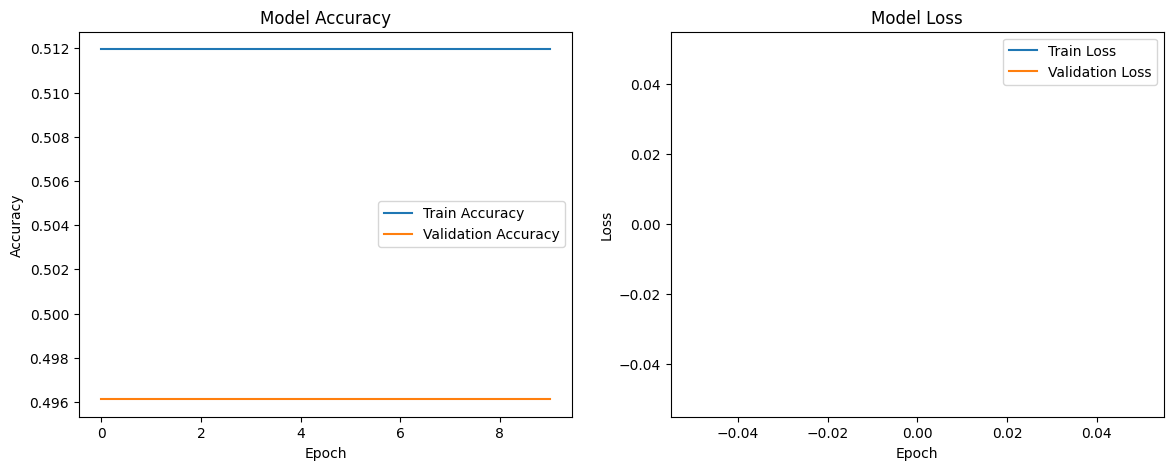

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5148 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5123 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5183 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5232 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 5/200
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5069 - loss: nan
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5070 - loss: nan - val_accuracy: 0.4961 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5046 - loss: nan - val_accuracy: 0.49

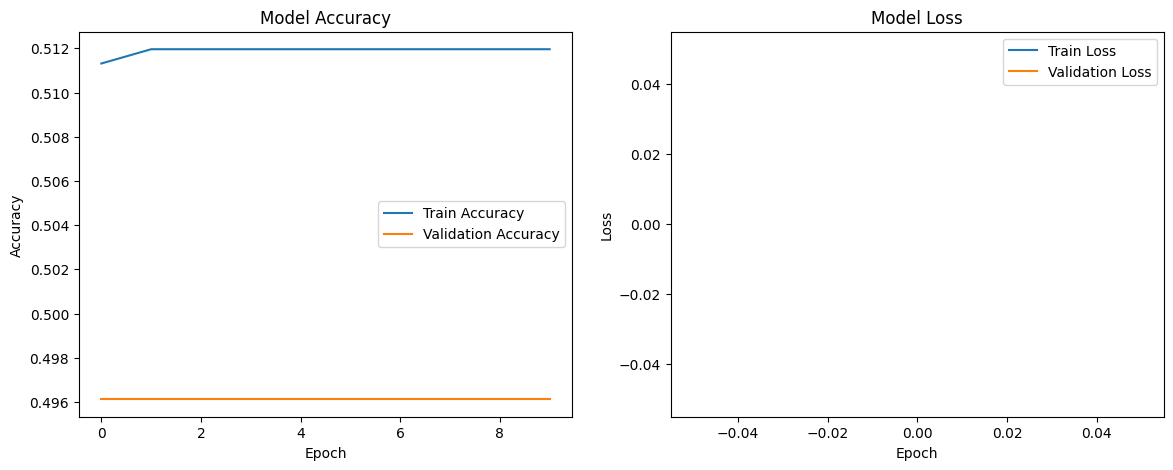

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], 1)

model = keras.Sequential([
    keras.layers.Conv2D(64, (1, 3), activation='relu', input_shape=(1, X_train.shape[2], 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((1, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, (1, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((1, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

DECISION TREE

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION', 'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x', 'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y', 'POSITION', 'TEAM_NAME_y', 'PTS'])
y = df['Conference']



In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)



In [ ]:
# Train model
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)



In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9855371900826446
              precision    recall  f1-score   support

        East       0.99      0.98      0.99       254
        West       0.98      0.99      0.98       230

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



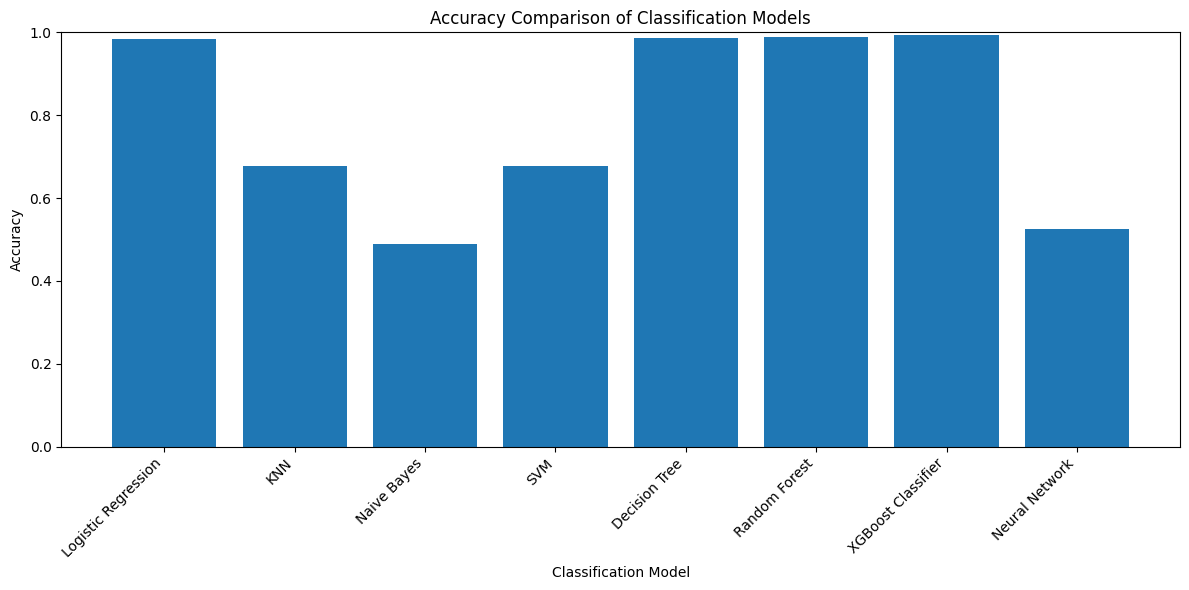

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
accuracy_scores = {
    'Logistic Regression': 0.9834710743801653,
    'KNN': 0.677686,
    'Naive Bayes': 0.4896694214876033,
    'SVM': 0.6776859504132231,
    'Decision Tree':  0.9855371900826446,
    'Random Forest': 0.9896694214876033,
    'XGBoost Classifier': 0.993801652892562,
    'Neural Network': 0.5247933864593506
}

df_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])


plt.figure(figsize=(12, 6))
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy'])
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

                 Model  Accuracy
0  Logistic Regression  0.983471
1                  KNN  0.677686
2          Naive Bayes  0.489669
3                  SVM  0.677686
4        Decision Tree  0.985537
5        Random Forest  0.989669
6   XGBoost Classifier  0.993802
7       Neural Network  0.524793


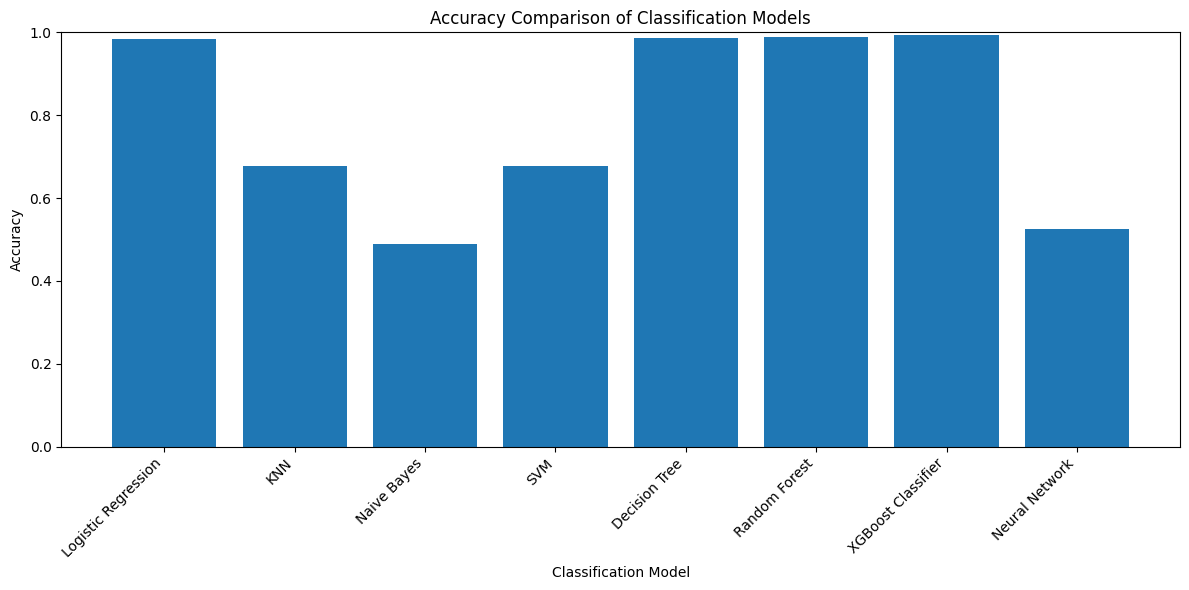

In [ ]:
# prompt: in the above image print the value of accuracies as well

accuracy_scores = {
    'Logistic Regression': 0.9834710743801653,
    'KNN': 0.677686,
    'Naive Bayes': 0.4896694214876033,
    'SVM': 0.6776859504132231,
    'Decision Tree':  0.9855371900826446,
    'Random Forest': 0.9896694214876033,
    'XGBoost Classifier': 0.993801652892562,
    'Neural Network': 0.5247933864593506
}

df_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
print(df_accuracy)

plt.figure(figsize=(12, 6))
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy'])
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

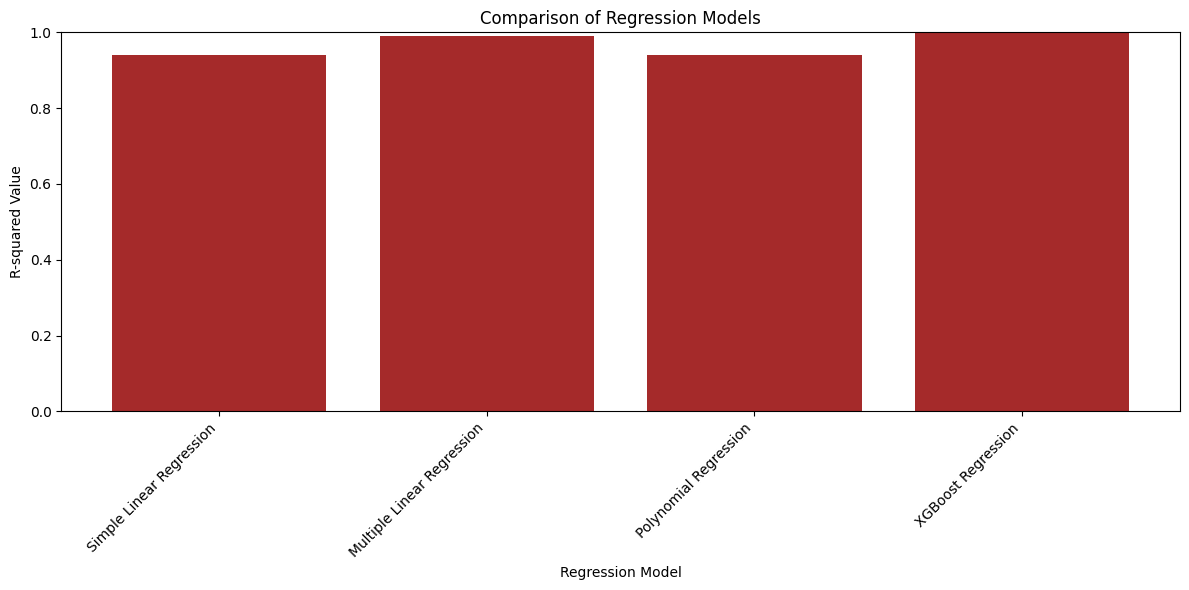

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'XGBoost Regression'],
    'R-squared': [0.94, 0.99, 0.94, 0.997]
}

df_comparison = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.bar(df_comparison['Model'], df_comparison['R-squared'], color=['brown'])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Value')
plt.title('Comparison of Regression Models')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have your features (X) and target (y) prepared as in your code
X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION',
                      'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x',
                      'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y',
                      'POSITION', 'TEAM_NAME_y', 'PTS'])
y = df['Conference']

# Encode the target variable (Conference)
le = LabelEncoder()
y = le.fit_transform(y)

# Feature selection using ANOVA F-value (Fisher score)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


Selected Features: Index(['W_x', 'L_x', 'DEF_RATING', 'W_RANK', 'W_PCT_RANK', 'DEF_RATING_RANK',
       'DREB_RANK', 'STL_RANK', 'BLK_RANK', 'OPP_PTS_OFF_TOV_RANK'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION',
                      'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x',
                      'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y',
                      'POSITION', 'TEAM_NAME_y', 'PTS'])
y = df['Conference']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost without feature selection
xgb_clf_without_fs = XGBClassifier()
xgb_clf_without_fs.fit(X_train, y_train)
y_pred_without_fs = xgb_clf_without_fs.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
print("XGBoost Classifier Accuracy (Without Feature Selection):", accuracy_without_fs)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train XGBoost with feature selection
xgb_clf_with_fs = XGBClassifier()
xgb_clf_with_fs.fit(X_train_fs, y_train_fs)
y_pred_with_fs = xgb_clf_with_fs.predict(X_test_fs)
accuracy_with_fs = accuracy_score(y_test_fs, y_pred_with_fs)
print("XGBoost Classifier Accuracy (With Feature Selection):", accuracy_with_fs)


# Compare the results
print("Difference in Accuracy:", accuracy_with_fs - accuracy_without_fs)


XGBoost Classifier Accuracy (Without Feature Selection): 0.993801652892562


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


XGBoost Classifier Accuracy (With Feature Selection): 1.0
Difference in Accuracy: 0.006198347107438051


In [ ]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report # Importing necessary modules for evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5971074380165289
              precision    recall  f1-score   support

           0       0.65      0.50      0.57       254
           1       0.56      0.70      0.62       230

    accuracy                           0.60       484
   macro avg       0.61      0.60      0.59       484
weighted avg       0.61      0.60      0.59       484



In [ ]:

# Train Naive Bayes without feature selection
gnb_without_fs = GaussianNB()
gnb_without_fs.fit(X_train, y_train)
y_pred_without_fs = gnb_without_fs.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
print("Naive Bayes Accuracy (Without Feature Selection):", accuracy_without_fs)


# Feature selection using ANOVA F-value (Fisher score)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Split the data with selected features into training and testing sets
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train Naive Bayes with feature selection
gnb_with_fs = GaussianNB()
gnb_with_fs.fit(X_train_fs, y_train_fs)
y_pred_with_fs = gnb_with_fs.predict(X_test_fs)
accuracy_with_fs = accuracy_score(y_test_fs, y_pred_with_fs)
print("Naive Bayes Accuracy (With Feature Selection):", accuracy_with_fs)


# Compare the results
print("Difference in Accuracy:", accuracy_with_fs - accuracy_without_fs)

Naive Bayes Accuracy (Without Feature Selection): 0.5971074380165289
Naive Bayes Accuracy (With Feature Selection): 0.5847107438016529
Difference in Accuracy: -0.012396694214875992


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


ENSEMBLE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df.drop(columns=['Conference', 'PLAYER_NAME', 'TEAM_NAME_x', 'LOCATION',
                      'Season Type', 'Logo_URL', 'DISPLAY_FIRST_LAST_x',
                      'TEAM_ABBREVIATION', 'HEADSHOT_URL', 'DISPLAY_FIRST_LAST_y',
                      'POSITION', 'TEAM_NAME_y', 'PTS'])
y = df['Conference']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Initialize and train XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
rf_predictions = rf_clf.predict(X_test)
xgb_predictions = xgb_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", accuracy)
print(classification_report(y_test, ensemble_predictions))

Ensemble Accuracy: 0.9917355371900827
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       254
           1       0.99      1.00      0.99       230

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



PCA APPLICATION


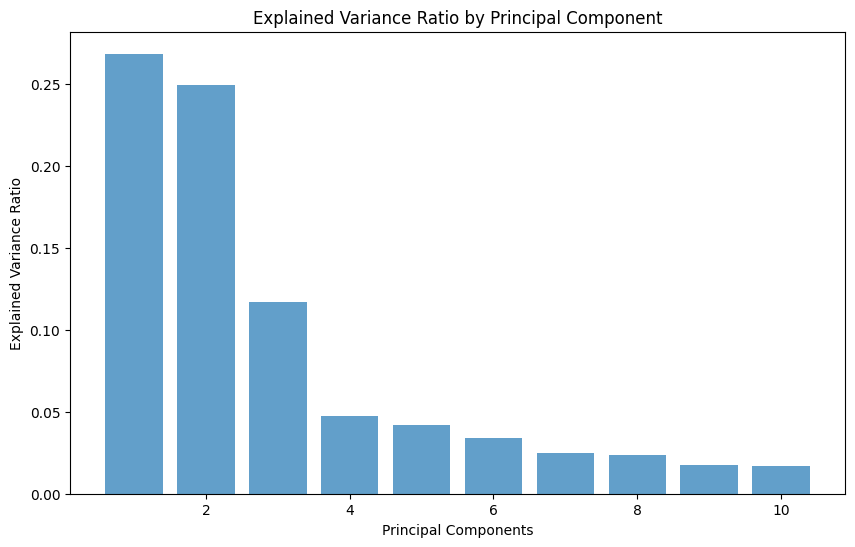

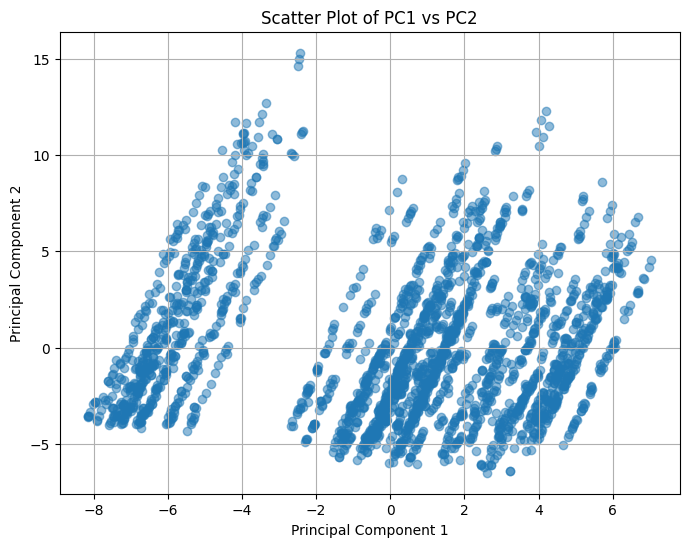

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.261810 -3.358508  2.176153 -1.288725 -0.433030 -0.778497  0.758982   
1 -0.131371 -2.787364  2.256283 -1.404647 -0.394501 -0.795450  0.766070   
2  2.194031 -4.663168 -1.043103 -1.121047 -0.584991 -0.891875  0.819464   
3  2.243609 -4.381438 -0.864381 -0.777875 -0.589671 -0.950996  0.682832   
4  0.750592 -3.353354  2.020336  0.127790  1.320779  0.715587  1.628828   

        PC8       PC9      PC10  
0  1.768466  0.282727  1.020213  
1  1.758888  0.229262  1.000840  
2  0.648100  2.348830 -1.273380  
3  0.775923  2.231463 -1.241937  
4  0.837070  0.909508  1.244144  


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'final_data.csv'
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include='number')
numeric_data = numeric_cols.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


print(pca_df.head())


In [17]:
pip install graphviz


In [19]:
from graphviz import Digraph

# Create a Digraph object
flowchart = Digraph("NBA_Player_Prediction_Flowchart", format="png")
flowchart.attr(rankdir="TB", size="8,10")

# Define nodes for flowchart
flowchart.node("Input", "Input: NBA 2023-24 Dataset")
flowchart.node("Cleaning", "Data Cleaning:\n- Remove Duplicates\n- Handle Outliers")
flowchart.node("Preprocessing", "Preprocessing:\n- Normalize Data\n- One-Hot Encoding")
flowchart.node("FeatureEngineering", "Feature Engineering:\n- PER Calculation\n- Text Vectorization")
flowchart.node("EDA", "EDA:\n- Correlation Matrix\n- Visualizations")
flowchart.node("Models", "Models:\n- Linear Regression (Regression)\n- XGBoost (Classification & Regression)\n- Random Forest\n- Neural Networks")
flowchart.node("Output", "Output:\nPredicted KPIs\n(Pts, Rebounds, Assists, etc.)")

# Add edges
flowchart.edges([
    ("Input", "Cleaning"),
    ("Cleaning", "Preprocessing"),
    ("Preprocessing", "FeatureEngineering"),
    ("FeatureEngineering", "EDA"),
    ("EDA", "Models"),
    ("Models", "Output")
])

# Render the flowchart to a file
output_path = "/mnt/data/nba_player_prediction_flowchart"
flowchart.render(output_path, view=False)

output_path_with_extension = f"{output_path}.png"
output_path_with_extension


'/mnt/data/nba_player_prediction_flowchart.png'

In [1]:
# Modify the flowchart with color-coded nodes

# Create a new Digraph object with color coding
flowchart_colored = Digraph("NBA_Player_Prediction_Flowchart_Colored", format="png")
flowchart_colored.attr(rankdir="TB", size="8,10")

# Define nodes with color coding
flowchart_colored.node("Input", "Input: NBA 2023-24 Dataset", style="filled", color="lightblue")
flowchart_colored.node("Cleaning", "Data Cleaning:\n- Remove Duplicates\n- Handle Outliers", style="filled", color="lightgreen")
flowchart_colored.node("Preprocessing", "Preprocessing:\n- Normalize Data\n- One-Hot Encoding", style="filled", color="yellow")
flowchart_colored.node("FeatureEngineering", "Feature Engineering:\n- PER Calculation\n- Text Vectorization", style="filled", color="orange")
flowchart_colored.node("EDA", "EDA:\n- Correlation Matrix\n- Visualizations", style="filled", color="lightpink")
flowchart_colored.node("Models", "Models:\n- Linear Regression (Regression)\n- XGBoost (Classification & Regression)\n- Random Forest\n- Neural Networks", style="filled", color="lightgray")
flowchart_colored.node("Output", "Output:\nPredicted KPIs\n(Pts, Rebounds, Assists, etc.)", style="filled", color="skyblue")

# Add edges
flowchart_colored.edges([
    ("Input", "Cleaning"),
    ("Cleaning", "Preprocessing"),
    ("Preprocessing", "FeatureEngineering"),
    ("FeatureEngineering", "EDA"),
    ("EDA", "Models"),
    ("Models", "Output")
])

# Render the modified flowchart to a file
output_colored_path = "/mnt/data/nba_player_prediction_flowchart_colored"
flowchart_colored.render(output_colored_path, view=False)

output_colored_path_with_extension = f"{output_colored_path}.png"
output_colored_path_with_extension


NameError: name 'Digraph' is not defined